# 1. IMPORTANDO LIBRERIAS DE PYTHON.

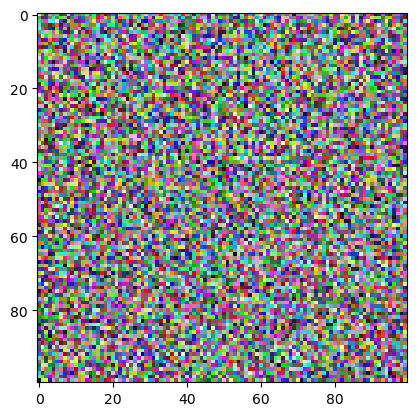

In [47]:
# Importación de bibliotecas
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np
from PIL import Image

# Crear una matriz de datos aleatorios
test_data = np.random.beta(1, 1, (100, 100, 3))

# Mostrar la imagen
plt.imshow(test_data)
plt.show()


# 2. ABRIENDO IMÁGENES CON PIL.

The image size is: (338, 338)


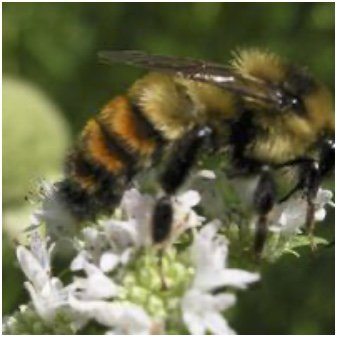

In [60]:
# Cargar una imagen
img = Image.open('bee_1.jpg')

# Obtener el tamaño de la imagen
img_size = img.size
print(f"The image size is: {img_size}")

# Mostrar la imagen
display(img)


# 3. MANIPULACIÓN DE IMÁGENES CON PIL.

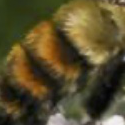

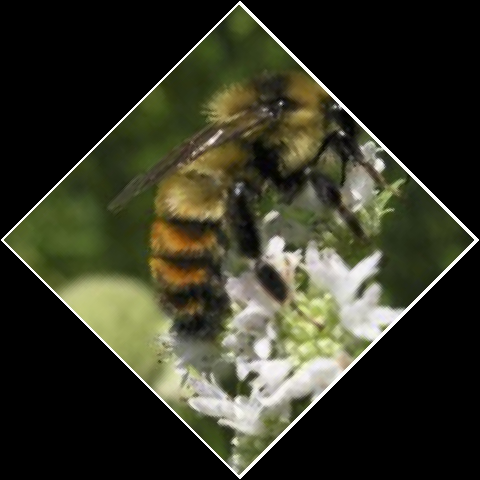

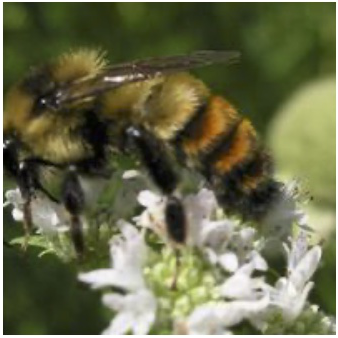

In [67]:
img_cropped = img.crop((75, 75, 200, 200))
display(img_cropped)


img_rotated = img.rotate(45, expand=True)
display(img_rotated)

img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)


# 4. IMÁGENES COMO BASES DE DATOS.

Our NumPy array has the shape: (338, 338, 3)


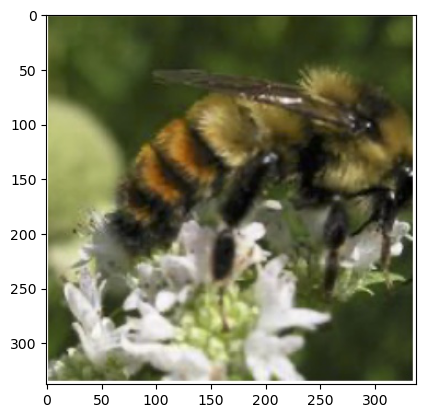

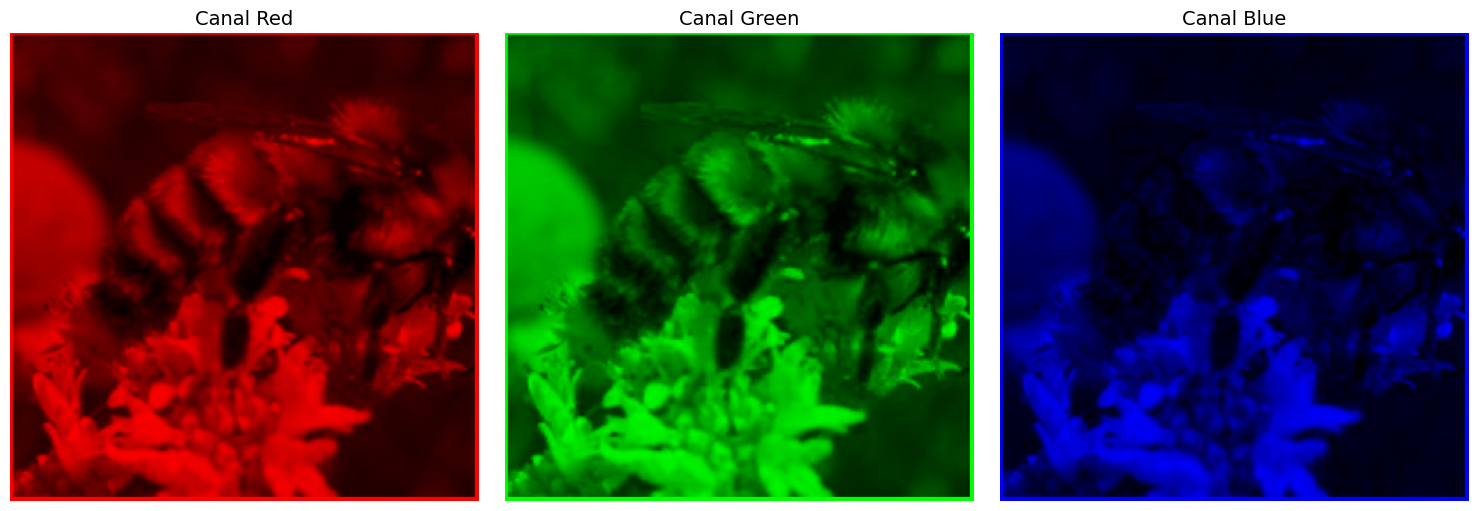

In [50]:
img_data = np.array(img)

print(f"Our NumPy array has the shape: {img_data.shape}")


plt.imshow(img_data)
plt.show()

def normalize_channel(channel):
    channel = channel.astype(float)
    return (channel - channel.min()) / (channel.max() - channel.min())

fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 

for ix, color in enumerate(['red', 'green', 'blue']):
    channel_img = np.zeros_like(img_data, dtype=float) 
    norm_channel = normalize_channel(img_data[:, :, ix])  
    channel_img[:, :, ix] = norm_channel

    axs[ix].imshow(channel_img)
    axs[ix].set_title(f'Canal {color.capitalize()}', fontsize=14)
    axs[ix].axis('off')

plt.tight_layout()
plt.show()



# 5. EXPLORAR LOS CANALES DE COLOR.

In [51]:
def plot_kde(canal, color):
    data = canal.flatten()
    return pd.Series(data).plot.density(c=color)

channels = ['r', 'g', 'b']

def plot_rgb(image_data):
    for ix, color in enumerate(channels):
        plot_kde(image_data[:, :, ix], color)
    plt.show()


# 6. ABEJAS DE MIEL Y ABEJORROS (I).

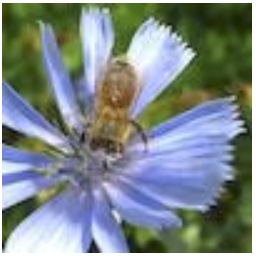

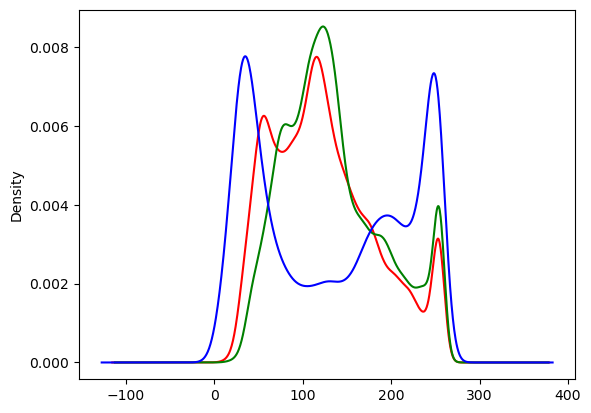

In [ ]:
honey = Image.open('bee_12.jpg')
display(honey)

honey_data = np.array(honey)
plot_rgb(honey_data)


# 7. ABEJAS DE MIEL Y ABEJORROS (II).

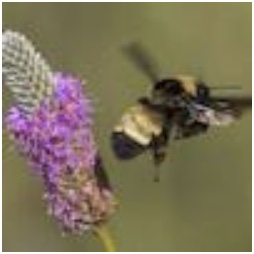

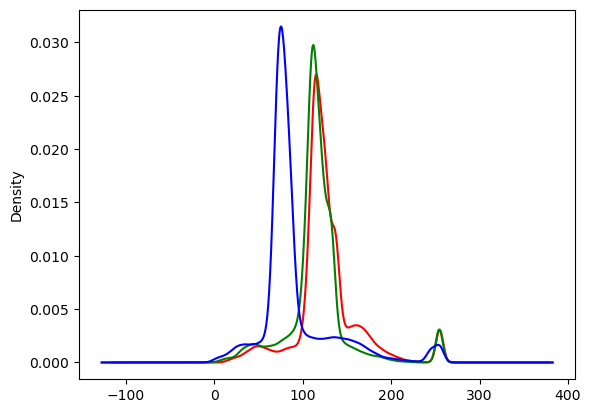

In [62]:
bumble = Image.open('bee_3.jpg')
display(bumble)

bumble_data = np.array(bumble)
plot_rgb(bumble_data)


# 8. SIMPLIFICAR, SIMPLIFICAR, SIMPLIFICAR.

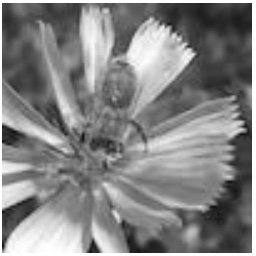

Our NumPy array has the shape: (256, 256)


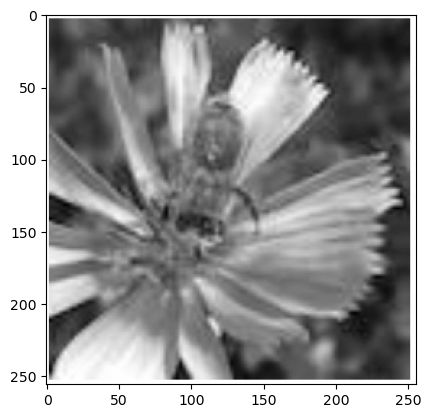

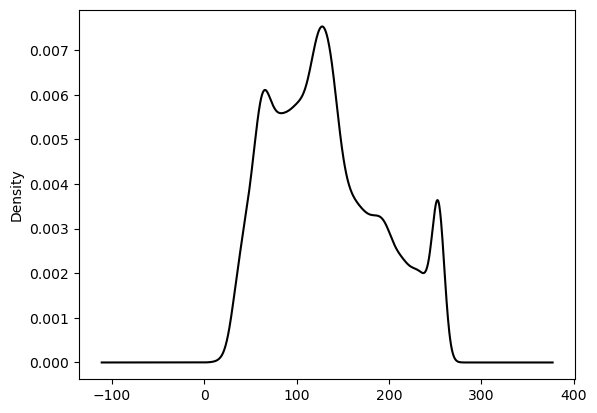

In [63]:
honey_bw = honey.convert('L')
display(honey_bw)

honey_bw_arr = np.array(honey_bw)
honey_bw_arr_shape = honey_bw_arr.shape
print("Our NumPy array has the shape: {}".format(honey_bw_arr_shape))

plt.imshow(honey_bw_arr, cmap='gray')
plt.show()

plot_kde(honey_bw_arr, 'k')
plt.show()


# 9. ¡GUARDAR SU TRABAJO!

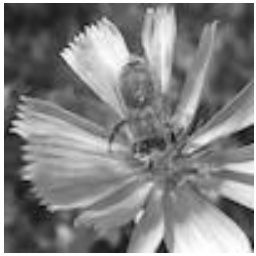

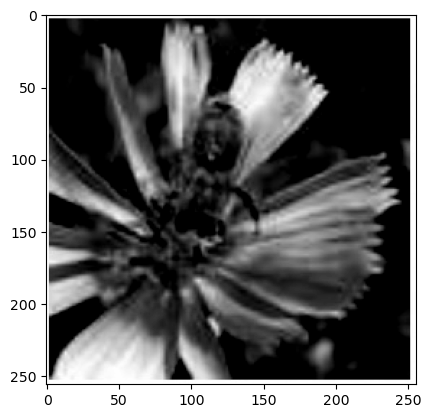

In [64]:

honey_bw_flip = honey_bw.transpose(Image.FLIP_LEFT_RIGHT)
display(honey_bw_flip)

honey_bw_flip.save('bw_flipped.jpg')

honey_hc_arr = np.maximum(honey_bw_arr, 100)

plt.imshow(honey_hc_arr, cmap='gray')
plt.show()

honey_bw_hc = Image.fromarray(honey_hc_arr)
honey_bw_hc.save('bw_hc.jpg')


# 10. REALIZAR UNA CANALIZACIÓN (PIPELINE)

In [69]:
image_paths = [
    'bee_1.jpg',
    'bee_2.jpg',
     'bee_3.jpg',
    'bee_12.jpg'
]

def process_image(path):
    path = Path(path)
    img = Image.open(path)

    bw_path = Path('img/') / f'bw_{path.stem}.jpg'
    rcz_path = Path('img/') / f'rcz_{path.stem}.jpg'

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert('L')
    bw.save(bw_path)

    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = img.rotate(45).crop((75, 75, 200, 200)).resize((100, 100))
    rcz.save(rcz_path)

for img_path in image_paths:
    process_image(img_path)


Creating grayscale version of bee_1.jpg and saving to img/bw_bee_1.jpg.
Creating rotated, cropped, and zoomed version of bee_1.jpg and saving to img/rcz_bee_1.jpg.
Creating grayscale version of bee_2.jpg and saving to img/bw_bee_2.jpg.
Creating rotated, cropped, and zoomed version of bee_2.jpg and saving to img/rcz_bee_2.jpg.
Creating grayscale version of bee_3.jpg and saving to img/bw_bee_3.jpg.
Creating rotated, cropped, and zoomed version of bee_3.jpg and saving to img/rcz_bee_3.jpg.
Creating grayscale version of bee_12.jpg and saving to img/bw_bee_12.jpg.
Creating rotated, cropped, and zoomed version of bee_12.jpg and saving to img/rcz_bee_12.jpg.
